### 无限网格

策略逻辑：
- 假设初始资金量为w0，网格数量为n_grid，网格距离为d_grid，maker交易手续费为tx
- 初始每个网格, limit单的资金量为 w0/n_grid
- 根据当前1分钟的close价格（c_t0），设置网格【上下摆limit单】
- 下1分钟的close(c_t1)和c_t0之间的limit单，视为成交
- 记录当前仓位w_t1，每一次价格变化，网格重新发生变化。
- 不平仓


In [1]:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from IPython.utils import io
from functions_processing_data import get_data
# from bt_grid import * 
from bt_grid_inf import * 
# from bt_grid_noprint import * 

In [4]:
file_name = "binance_futures_BTCUSDT_20200101_20220322.csv"
df_data = get_data(file_name)
df_data = df_data.loc[df_data.index > pd.to_datetime("2021/6/1"), :].iloc[:100]

In [27]:
# file_name = "binance_futures_BTCUSDT_20220329_tick.csv"
# data_path = os.path.join(os.getcwd(), "data")
# df_data = pd.read_csv(
#             os.path.join(data_path, file_name), header=[0], index_col=[0]
#         )
# df_data.index = pd.to_datetime(df_data.index, unit="s")
# df_data.rename(
#             columns={
#                 "Time": "time",
#                 "Open": "open",
#                 "High": "high",
#                 "Close": "close",
#                 "Low": "low",
#                 "Volume": "volume",
#                 "price": "close",
#             },
#             inplace=True,
#         )
# df_data

1.7923907359999292

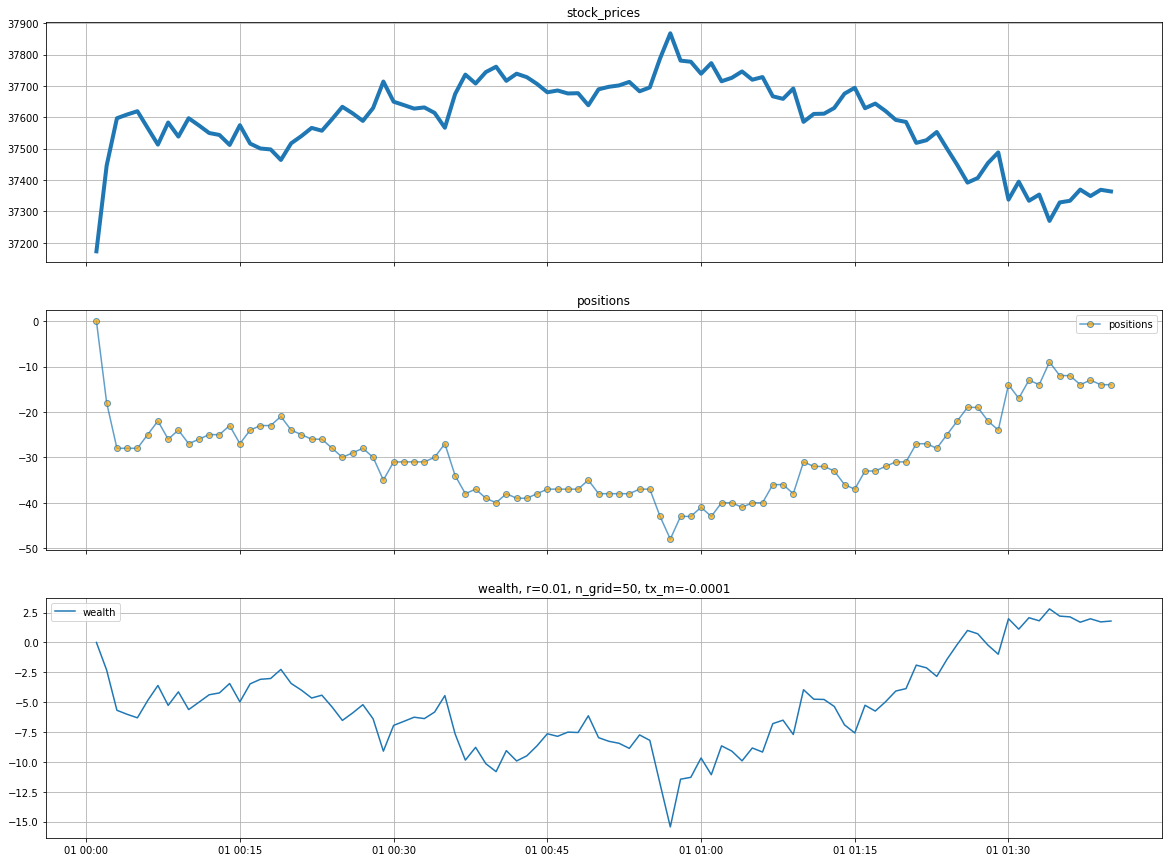

In [6]:
# 策略参数
w0 = 0
r = 0.01
n_grid = 50
tp = "arth"

# test 
static_grid_bt = InfGridBT(
    w0,
    r,
    n_grid,
    tp,
    df_data.close,
    is_trading_even=False,
    tx_m=-0.0001,
    tx_t=-0.0001,
    grid_quantity=0.001
)
# print("static_grid_bt.positions: ", static_grid_bt.positions)
# static_grid_bt.pa, static_grid_bt.pb, static_grid_bt.last_grid
# static_grid_bt.run_on_bar()
with io.capture_output() as captured: # this will supress (e.g. capture) stdout and stderr
    static_grid_bt.run_on_bar()
static_grid_bt.plot_results()
static_grid_bt.wealth.iloc[-1]


-207.46674516999872

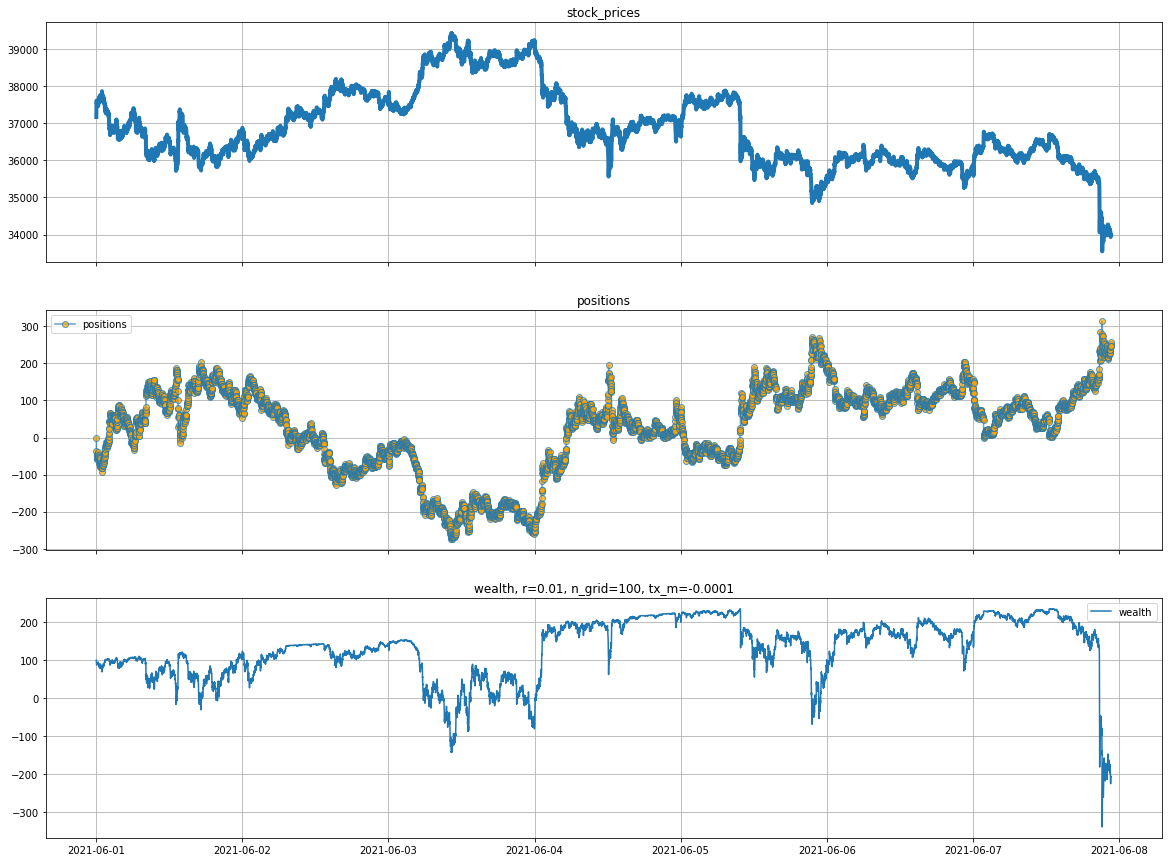

In [37]:
# 策略参数
w0 = 100
r = 0.01
n_grid = 100
tp = "arth"

# test 
static_grid_bt = InfGridBT(
    w0,
    r,
    n_grid,
    tp,
    df_data.close,
    is_trading_even=False,
    tx_m=-0.0001,
    tx_t=-0.0001,
    grid_quantity=0.001
)
# print("static_grid_bt.positions: ", static_grid_bt.positions)
# static_grid_bt.pa, static_grid_bt.pb, static_grid_bt.last_grid
# static_grid_bt.run_on_bar()

with io.capture_output() as captured: # this will supress (e.g. capture) stdout and stderr
    static_grid_bt.run_on_bar()
static_grid_bt.plot_results()
static_grid_bt.wealth.iloc[-1]

100.53082864000011

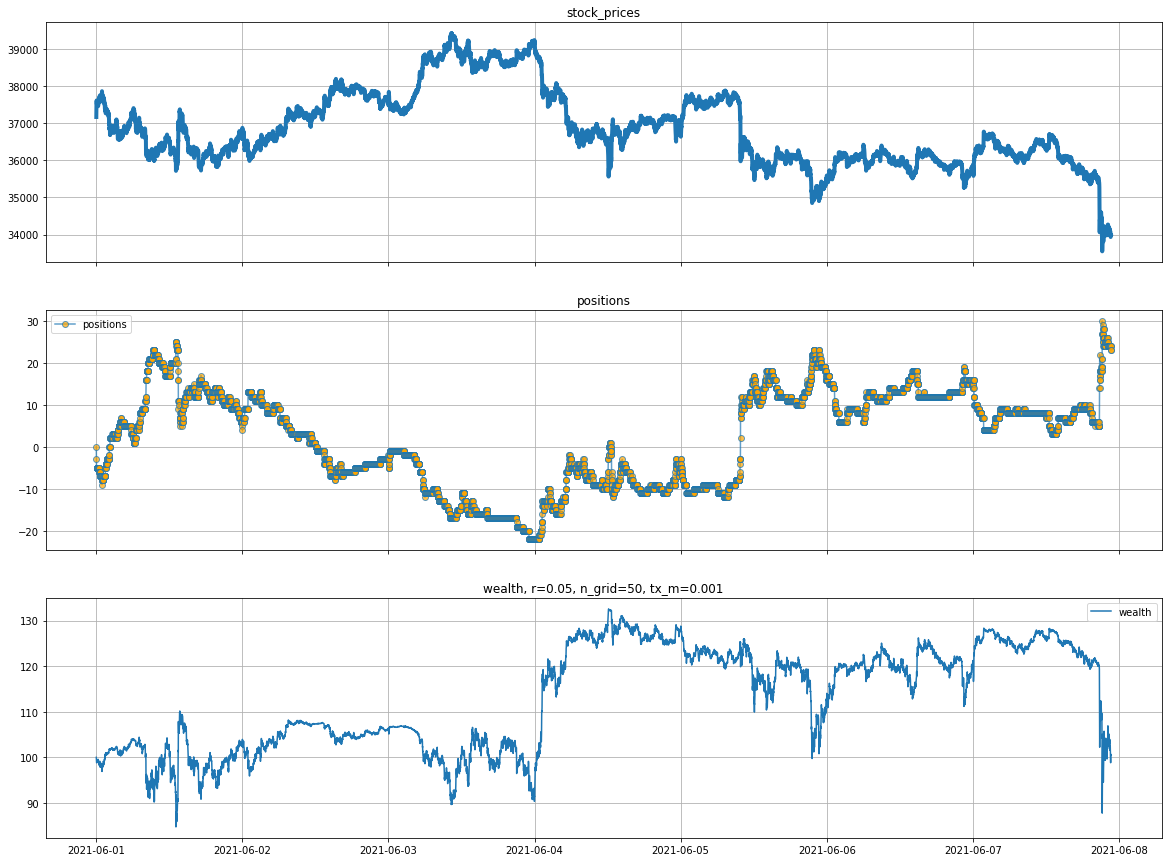

In [35]:
# 策略参数
w0 = 100
r = 0.05
n_grid = 50
tp = "arth"

# test 
static_grid_bt = InfGridBT(
    w0,
    r,
    n_grid,
    tp,
    df_data.close,
    is_trading_even=False,
    tx_m=0.001,
    tx_t=0.001,
    grid_quantity=0.001
)
# print("static_grid_bt.positions: ", static_grid_bt.positions)
# static_grid_bt.pa, static_grid_bt.pb, static_grid_bt.last_grid
# static_grid_bt.run_on_bar()

with io.capture_output() as captured: # this will supress (e.g. capture) stdout and stderr
    static_grid_bt.run_on_bar()
static_grid_bt.plot_results()
static_grid_bt.wealth.iloc[-1]